# Logistic Regression
For the perceptron model, we ran the model on two different sets of attributes, Flavanoids vs. Color Intensity and Magnesium vs. Non-Flavanoid Phenols for two different classes of wine. Our observations were that because for Flavanoids vs. Color Intensity the data was relatively linearly separable, the perceptron model performed pretty well in classification. However, for the Magnesium vs. Non-Flavanoid Phenol non-linearly separable data, the perceptron model performed very poorly. Our next step is to take some of these same attributes and see what happens when we use logistic regression, as well as see if we perform any better.

### Import Libraries
Let's first import some of our standard libraries and set a standard theme.

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

## Plot Linearly Separable vs. Non-Linearly Separable
Let's first re-plot the Flavanoid vs. Color Intensity data and the Magnesium vs. Non-Flavanoid Phenols data to remind ourselves of the differences between the two attributes.

### Load data
First, we need to load the load_wine dataset.

In [54]:
# The artificial data will be taken from sklearn (load_wine)
from sklearn.datasets import load_wine

data, target = load_wine(return_X_y=True, as_frame=True)

### Set target "y" and data "X"
We now set our target to be classified. In the load_wine data set, there are three classes of wine. However, for the Logistic regression model, we will only be using two classes of wine, as our logistic regression model uses binary classification. In this case, we will try to classify Class 1 and 2 wines using various attributes.

In [55]:
y=target.iloc[59:].to_numpy()
X = data.iloc[59:]

### Plot data
Now we are ready to plot the data. As we can see, Flavanoid vs. Color Intensity is pretty linearly separable while Magnesium vs. Non-Flavanoid Phenols are not. This means that we can't split Magnesium vs. Non-Flavanoid Phenols in any linear sense.

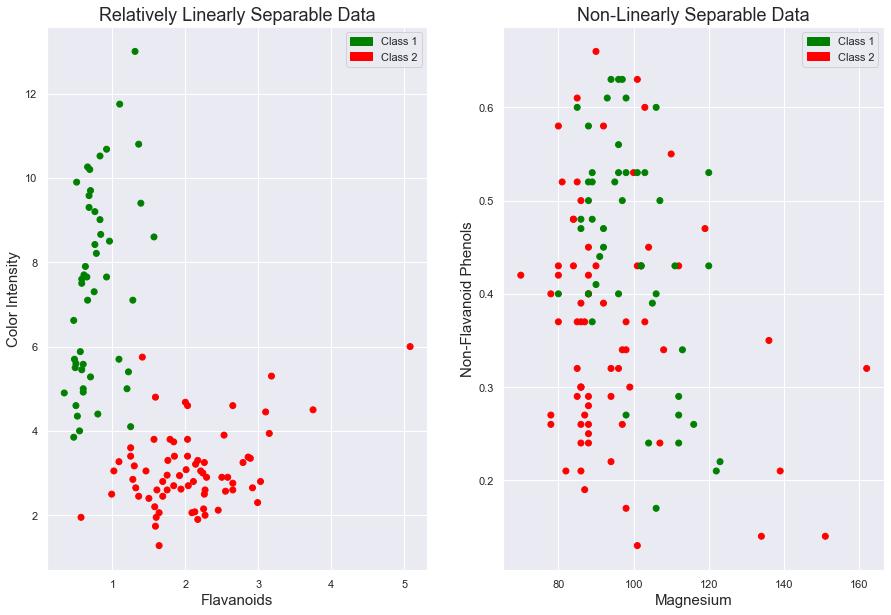

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

#Plot data for Flavanoids vs. Color Intensity
colors = ["red" if label == 1 else "green" for label in y]
X = data[["flavanoids", "color_intensity"]].iloc[59:].values
ax1.scatter(X[:,0], X[:,1], c = colors)
ax1.set_title("Relatively Linearly Separable Data", fontsize = 18)
ax1.set_xlabel("Flavanoids", fontsize = 15)
ax1.set_ylabel("Color Intensity", fontsize = 15)

#Plot legend
import matplotlib.patches as mpatches
Class_1 = mpatches.Patch(color='green', label='Class 1')
Class_2 = mpatches.Patch(color='red', label='Class 2')
ax1.legend(handles=[Class_1, Class_2])
ax1.grid(True)

#Plot data for Magnesium vs. Non-Flavanoid Phenols
colors = ["red" if label == 1 else "green" for label in y]
X = data[["magnesium", "nonflavanoid_phenols"]].iloc[59:].values
ax2.scatter(X[:,0], X[:,1], c = colors)
ax2.set_title("Non-Linearly Separable Data", fontsize = 18)
ax2.set_xlabel("Magnesium", fontsize = 15)
ax2.set_ylabel("Non-Flavanoid Phenols", fontsize = 15)

#Plot legend
import matplotlib.patches as mpatches
Class_1 = mpatches.Patch(color='green', label='Class 1')
Class_2 = mpatches.Patch(color='red', label='Class 2')
ax2.legend(handles=[Class_1, Class_2])
ax2.grid(True)

### Enter Logistic Regression
How do we deal with non-linearly separable data? One way to do this is through logistic regression, which basically gives the probability that given a certain attribute it is likely to be in which class (Class 1 or 2). Let's see what happens if we plot Class 1 or 2 given the Magnesium Level. As we can see, there is potential separation between the data, though it also still seems to have a lot of overlap. This could potentially gives us bad results.

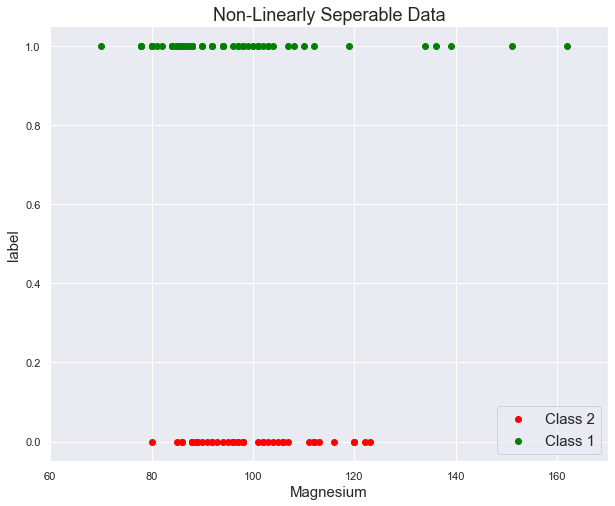

In [57]:
plt.figure(figsize = (10, 8))
plt.xlim((60, 170))

#Add target column to data
data["target"] = target

Class1 = data[data.target == 1]
Class2 = data[data.target == 2]

plt.scatter(Class2.magnesium, 
            np.zeros(np.size(Class2.magnesium)), 
            color = "red", 
            label = "Class 2")
plt.scatter(Class1.magnesium, 
            np.ones(np.size(Class1.magnesium)), 
            color = "green", 
            label = "Class 1")
plt.vlines(43.0, 0.0, 1.0)
plt.xlabel("Magnesium", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()

### Defining the Sigmoid Function
One potentially good function that can be used to activate the logistic regression model is the Sigmoid function, which has a lot of really great properties, such as continually goes from 0 to 1.

Sigmoid function: 

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Let's define the Sigmoid Function below.


In [58]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

### Plot Sigmoid Function
Now let's plot the sigmoid function next to our magnesium levels to see if there are any similarities. The similarities don't seem to be huge, but they are there.

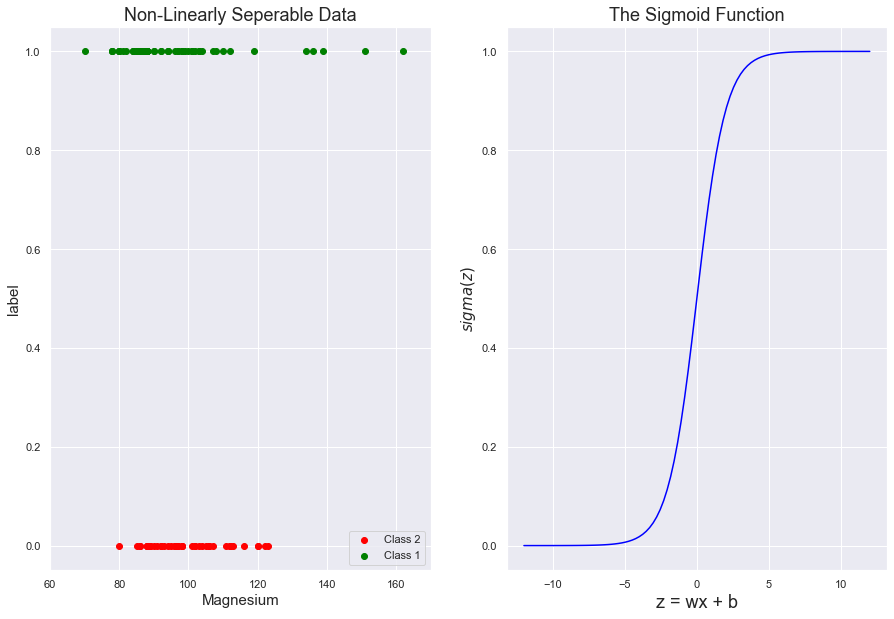

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.set_xlim((60, 170))
ax1.scatter(Class2.magnesium, 
            np.zeros(np.size(Class2.magnesium)), 
            color = "red", 
            label = "Class 2")
ax1.scatter(Class1.magnesium, 
            np.ones(np.size(Class1.magnesium)), 
            color = "green", 
            label = "Class 1")
ax1.set_xlabel("Magnesium", fontsize = 15)
ax1.set_ylabel("label", fontsize = 15)
ax1.set_title("Non-Linearly Seperable Data", fontsize = 18)
ax1.legend()


domain = np.linspace(-12.0, 12.0, 100)
ax2.plot(domain, 
        sigmoid(domain), 
        color = "blue", 
        label = "$\sigma$(z)")
ax2.set_xlabel("z = wx + b", fontsize = 18)
ax2.set_ylabel("$sigma(z)$", fontsize = 15)
ax2.set_title("The Sigmoid Function", fontsize = 18)
plt.show()

### Defining the Logistic Regression Model
Now let's actually define our logistic regression model. As we can see, its attributes are actually extremely similarly, with it's iterative methods being virtually the same, with the exception of the cost function (which we will use Bernoulli's formula for), and the activation function (which we use sigmoid for).

In [60]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        np.random.seed(1)
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

### Cost Function
Our cost function is a little different than the linear regression cost function. Instead of using mean squared error, we use the binary cross entropy loss function, which we derive from Bernoulli's formula.

In [61]:
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

### Run Logistic Regression Model on Magnesium Values
Now let's run the logistic regression model on the magnesium values and see what happens. While the function runs, we seem to be getting a run-time warning, which could be problematic.

In [62]:
node = SingleNeuron(sigmoid, cross_entropy_loss)

X = data.iloc[59:].magnesium.values
X = X.reshape(-1, 1)
y = np.where(data.iloc[59:].target.values == 2, 0, 1)

node.train(X, y, alpha = 0.0000001, epochs = 1000)

<ipython-input-61-7613a36779a2>:2: RuntimeWarning: divide by zero encountered in log
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)
<ipython-input-61-7613a36779a2>:2: RuntimeWarning: invalid value encountered in multiply
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)


### Plot Cost Function
Let's see what happens when we plot the errors. The error seems to go down in a smooth manner, so maybe the function will look pretty good. However, the cost seems to be pretty high.

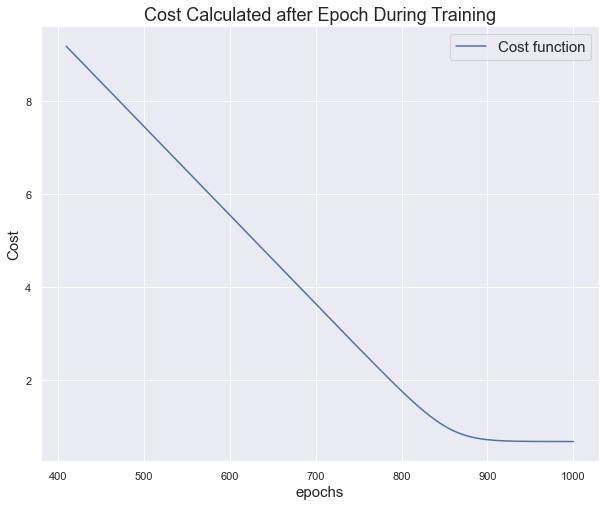

In [63]:
node.plot_cost_function()
plt.show()

### Plot Logistic Curve
Now let's plot the logistic curve. Wow! It looks pretty off! 

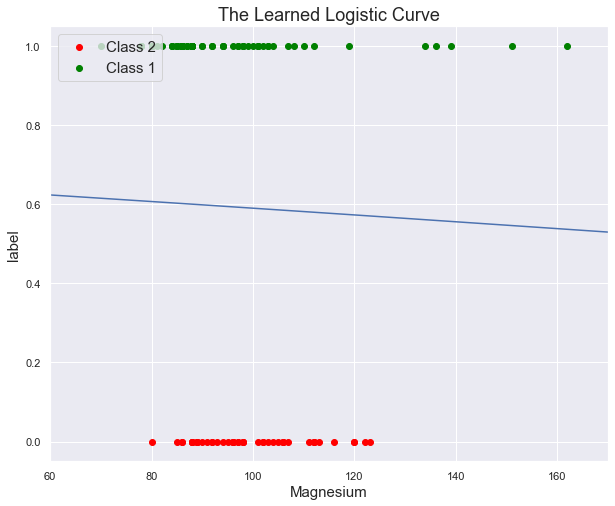

In [64]:
plt.figure(figsize = (10, 8))
plt.xlim((60, 170))
plt.scatter(Class2.magnesium, 
            np.zeros(np.size(Class2.magnesium)), 
            color = "red", 
            label = "Class 2")
plt.scatter(Class1.magnesium, 
            np.ones(np.size(Class1.magnesium)), 
            color = "green", 
            label = "Class 1")

domain = np.linspace(60, 170, 1000)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("Magnesium", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

### Predict Class
We can also use logistic regression to predict the class of a point given a certain attribute (which in this case is magnesium). If, say, the probability of an object is greater than 0.5 for Class 2 given a certain magnesium level, then we can classify it as Class 2. Let's see how our Logistic Regression model performed. True means a correct classification and false means an incorrect classification. There seem to be a lot of falses!

In [65]:
np.rint(node.predict(X)) == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

### Classification error
Let's calculate the percent of data that was classified incorrectly. Oof! 40% is pretty high!

In [66]:
classification_error = (np.rint(node.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.40336134453781514


### Set Predicted Labels
Let's set y_hat to be the predicted labels to further analyze the error

In [67]:
# Predict labels on the features in X
y_hat = np.rint(node.predict(X))

### Plot Confusion Matrix
One way to analyze the error is to plot the confusion matrix. The confusion matrix can easily tell us which points were categorized correctly and in which category. This allows us to see the error more clearly. If you want to learn more about the confusion matrix, you can reference my introductory README. As we can see from this confusion matrix, logistic regression didn't do much better with classifying the data than the perceptron model. In fact, it also only guessed one value, and the only reason it did better was that it guessed the value with more data points in it.

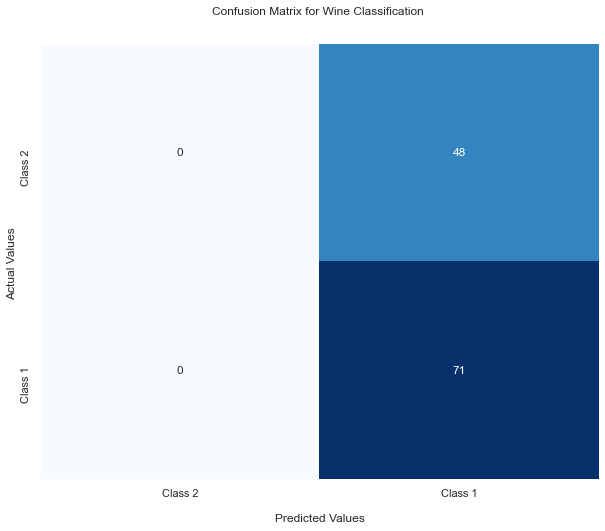

In [68]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y, y_hat)

plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False) #no color bar: cbar

ax.set_title('Confusion Matrix for Wine Classification \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Class 2','Class 1'])
ax.yaxis.set_ticklabels(['Class 2','Class 1'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Display Classification Report
Another way we can analyze the error is through the classification report. This can tell us how good the recall and precision of our classification is. As we can see, the Logistic Regression Model classified our data quite poorly!

In [69]:
from sklearn.metrics import classification_report

#Checking performance our model with classification report.
print(classification_report(y, y_hat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.60      1.00      0.75        71

    accuracy                           0.60       119
   macro avg       0.30      0.50      0.37       119
weighted avg       0.36      0.60      0.45       119



C:\Users\wwang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wwang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wwang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Plot Decision Boundary
Finally, let's plot the decision boundary. Oh no! As we can see, the data is just being classified as one class. This is the same problem that we ran into for the perceptron model. Although the logistic regression can be useful in classifying data, it can still perform poorly, and thus we must continue our search for better classification methods.

C:\Users\wwang\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


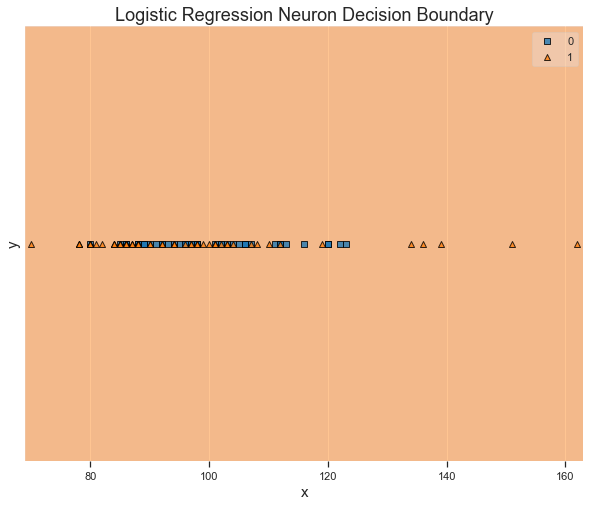

In [70]:
node.plot_decision_boundary(X, y)
plt.show()

## Try same method with slightly more linearly separable data
Let's try the same method for logistic regression as we did above, only using flavanoids as our measurement, as we know that the data is a little more linearly separable.

### Plot Sigmoid Function
Now let's plot the sigmoid function next to our flavanoid levels to see if there are any similarities. The similarities seem to be a bit bigger than for magnesium levels.

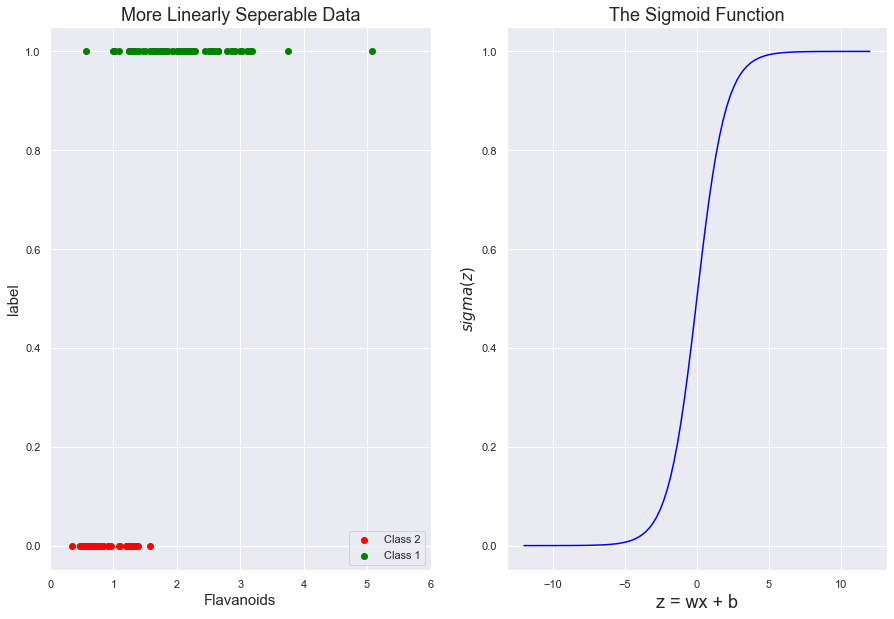

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.set_xlim((0, 6))
ax1.scatter(Class2.flavanoids, 
            np.zeros(np.size(Class2.flavanoids)), 
            color = "red", 
            label = "Class 2")
ax1.scatter(Class1.flavanoids, 
            np.ones(np.size(Class1.flavanoids)), 
            color = "green", 
            label = "Class 1")
ax1.set_xlabel("Flavanoids", fontsize = 15)
ax1.set_ylabel("label", fontsize = 15)
ax1.set_title("More Linearly Seperable Data", fontsize = 18)
ax1.legend()


domain = np.linspace(-12.0, 12.0, 100)
ax2.plot(domain, 
        sigmoid(domain), 
        color = "blue", 
        label = "$\sigma$(z)")
ax2.set_xlabel("z = wx + b", fontsize = 18)
ax2.set_ylabel("$sigma(z)$", fontsize = 15)
ax2.set_title("The Sigmoid Function", fontsize = 18)
plt.show()

### Run Logistic Regression Model on Magnesium Values
Now let's run the logistic regression model on the magnesium values and see what happens. Note that there is no run-time warning this time, which is a good sign.

In [72]:
node = SingleNeuron(sigmoid, cross_entropy_loss)

X = data.iloc[59:].flavanoids.values
X = X.reshape(-1, 1)
y = np.where(data.iloc[59:].target.values == 2, 0, 1)

node.train(X, y, alpha = 0.01, epochs = 1000)

### Plot Cost Function
Let's see what happens when we plot the errors. The error seems to go down in a smooth manner, and cost seems to be much lower.

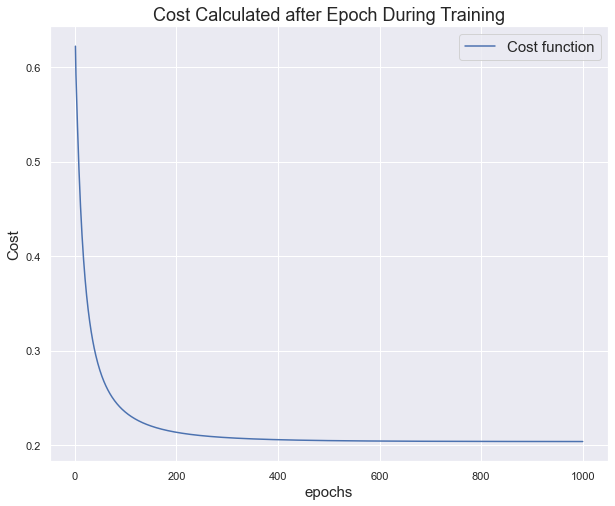

In [73]:
node.plot_cost_function()
plt.show()

### Plot Logistic Curve
Now let's plot the logistic curve. Wow! It looks a lot better than the magnesium one! 

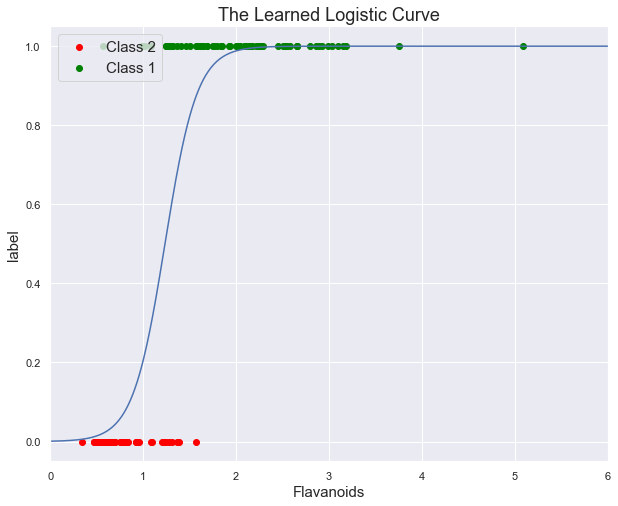

In [74]:
plt.figure(figsize = (10, 8))
plt.xlim((0, 6))
plt.scatter(Class2.flavanoids, 
            np.zeros(np.size(Class2.flavanoids)), 
            color = "red", 
            label = "Class 2")
plt.scatter(Class1.flavanoids, 
            np.ones(np.size(Class1.flavanoids)), 
            color = "green", 
            label = "Class 1")

domain = np.linspace(0, 6, 1000)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("Flavanoids", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

### Predict Class
We can also use logistic regression to predict the class of a point given a certain attribute (which in this case is flavanoids). If, say, the probability of an object is greater than 0.5 for Class 2 given a certain flavanoid level, then we can classify it as Class 2. Let's see how our Logistic Regression model performed. True means a correct classification and false means an incorrect classification. There seem to be mostly trues, which is really good!

In [75]:
np.rint(node.predict(X)) == y

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

### Classification error
Let's calculate the percent of data that was classified incorrectly. Wow! Only 8% now! This is much better than our regression model for magnesium levels.

In [76]:
classification_error = (np.rint(node.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.08403361344537816


### Set Predicted Labels
Let's set y_hat to be the predicted labels to further analyze the error

In [77]:
# Predict labels on the features in X
y_hat = np.rint(node.predict(X))

### Plot Confusion Matrix
One way to analyze the error is to plot the confusion matrix. The confusion matrix can easily tell us which points were categorized correctly and in which category. This allows us to see the error more clearly. If you want to learn more about the confusion matrix, you can reference my introductory README. As we can see from this confusion matrix, logistic regression is doing much better for flavanoids than magnesium.

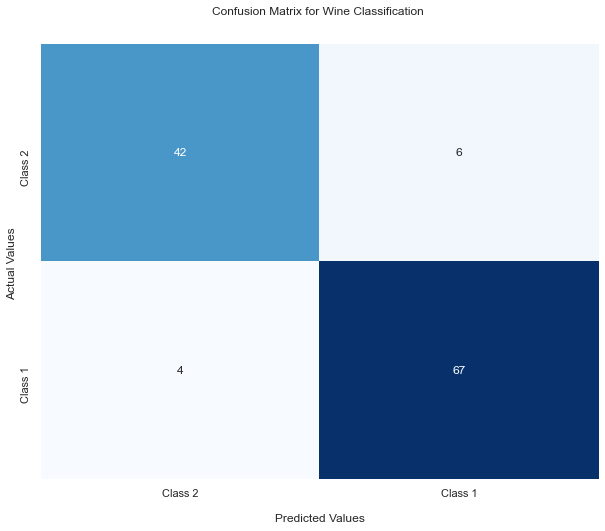

In [78]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y, y_hat)

plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False) #no color bar: cbar

ax.set_title('Confusion Matrix for Wine Classification \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Class 2','Class 1'])
ax.yaxis.set_ticklabels(['Class 2','Class 1'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Display Classification Report
Another way we can analyze the error is through the classification report. This can tell us how good the recall and precision of our classification is. As we can see, the Logistic Regression Model classified our data quite well!

In [79]:
from sklearn.metrics import classification_report

#Checking performance our model with classification report.
print(classification_report(y, y_hat))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        48
           1       0.92      0.94      0.93        71

    accuracy                           0.92       119
   macro avg       0.92      0.91      0.91       119
weighted avg       0.92      0.92      0.92       119



### Plot Decision Boundary
Finally, let's plot the decision boundary. Again, the logistic regression model performed quite well using flavanoids as values.

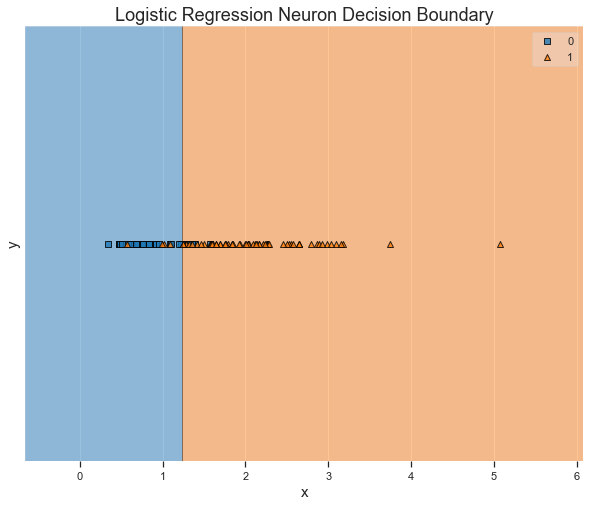

In [80]:
node.plot_decision_boundary(X, y)
plt.show()

### Logistic Regression with Multiple Inputs
Thus far we have only used a single feature measurement as input into our logistic regression single neuron model, but what happens when we use multiple measurements? Let's see what happens when we use both flavanoids and color intensity. As we can see, the error using multiple measurements as opposed to just one measurement/attribute is much lower.

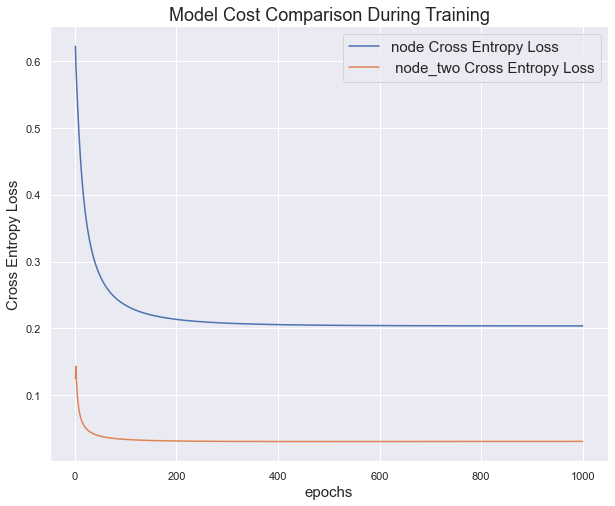

In [81]:
# Instantiate a new single neuron.
node_two = SingleNeuron(sigmoid, cross_entropy_loss)

# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively. 
X_two = data.iloc[59:][["flavanoids", "color_intensity"]].values

# Train the new single neuron model on the new feature vectors.
node_two.train(X_two, y, alpha = 0.05, epochs = 1_000)


plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         label = "node Cross Entropy Loss")
plt.plot(range(1, len(node_two.errors_) + 1), 
         node_two.errors_,
         label = " node_two Cross Entropy Loss")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("Cross Entropy Loss", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Model Cost Comparison During Training", fontsize = 18)


plt.show()

### Plot Decision Boundary
We can also plot the decision boundary for our model. It looks like it is performing quite well!

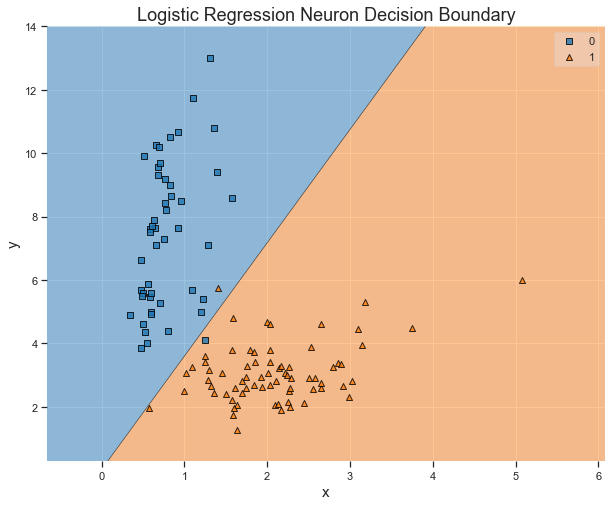

In [82]:
node_two.plot_decision_boundary(X_two, y)

### Set Predicted Labels
Let's set y_hat to be the predicted labels to further analyze the error

In [83]:
# Predict labels on the features in X
y_hat = np.rint(node_two.predict(X_two))

### Plot Confusion Matrix
Let's analyze the confusion matrix. Wow! The data is classified extremely well, even better than the perceptron model!

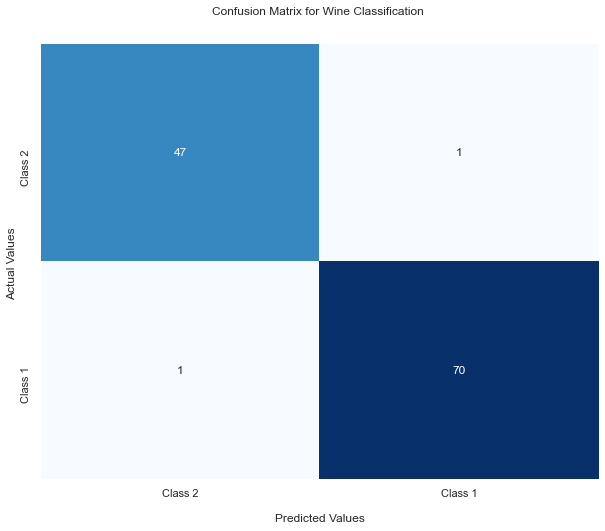

In [84]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y, y_hat)

plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False) #no color bar: cbar

ax.set_title('Confusion Matrix for Wine Classification \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Class 2','Class 1'])
ax.yaxis.set_ticklabels(['Class 2','Class 1'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Classification Report
Let's confirm our findings with our classification report. Our results are super good! All of our scores are above 0.98, which is incredibly accurate.

In [85]:
from sklearn.metrics import classification_report

#Checking performance our model with classification report.
print(classification_report(y, y_hat))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        48
           1       0.99      0.99      0.99        71

    accuracy                           0.98       119
   macro avg       0.98      0.98      0.98       119
weighted avg       0.98      0.98      0.98       119



## Takeaways
As we can see, we learned a few things from this module. The first lesson we took away was still the importance of having relatively linearly separable data. Although logistic regression performs much better than the perceptron model on non-linearly separable data, if the data is too overlapping, it can still cause a lot of problems. However, through this module, we have also seen how accurate logistic regression can be. When compared to the perceptron model for classifying based on flavanoids and color intensity, logistic regression performed even better. In subsequent models, let's continue to explore different methods of classification and see how they perform.